# ISMIR 2021 -- Scales, chords, and cadences: Practical music theory for MIR Researchers
## Session 1 -- Scales

## 1 Scale Identification (Key Finding) -- Major/Minor
### 1.1 Music21 -- Symbolic Music
Import libraries.

In [120]:
from music21 import *              # analysis package for symbolic data
import numpy as np
import librosa                     # music/audio package 
import librosa.display
import matplotlib.pyplot as plt    # plotting
import seaborn as sns              # data visualization based on matplotlib
import IPython.display as ipd      # audio playback
import pyACA                       # Audio Content Analysis
#from keyedin import pitchdistribution as pd, classifiers


## Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} librosa

## Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install keyedin

#### 1.1.1 Example 1 -- TAVERN, K. 573
Let's import the opening phrase from the first movement of Mozart's K. 573, encoded in .krn in the TAVERN data set. (You can download TAVERN here: <a href="https://github.com/jcdevaney/TAVERN" target="_blank">https://github.com/jcdevaney/TAVERN</a>.)

In [121]:
theme1 = converter.parse("M573_00_01a_a.krn")

Now let's visualize the score using Music21.

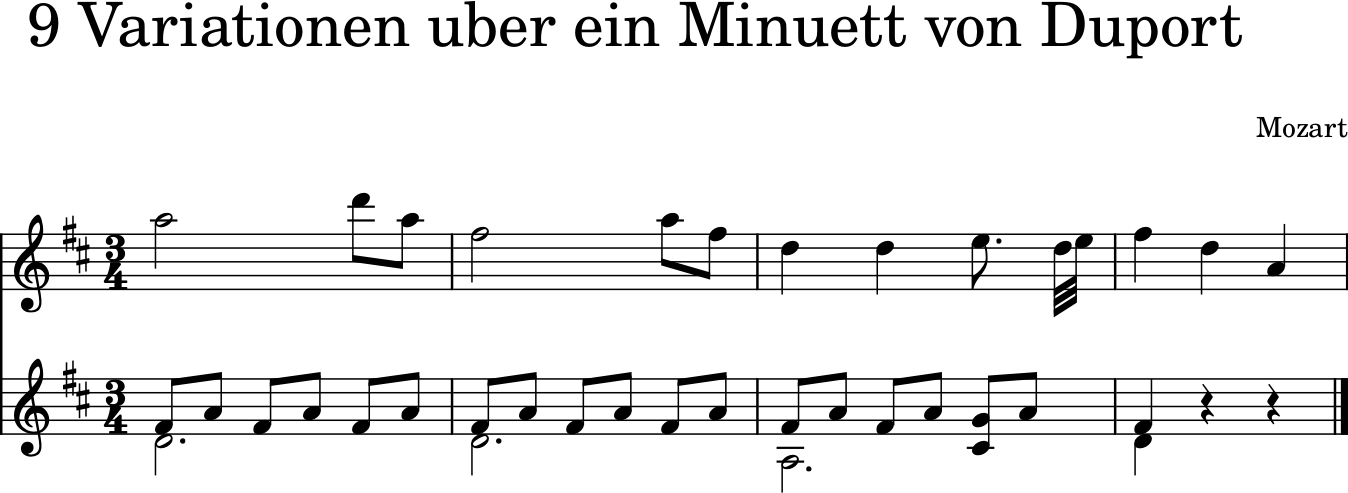

In [122]:
theme1.show()

One typical approach to identifying the operative key/scale is to compare a 0th-order distribution of pitch classes to the Krumhansl-Kessler (1982) key profiles. Here's the major-key profile for C major.

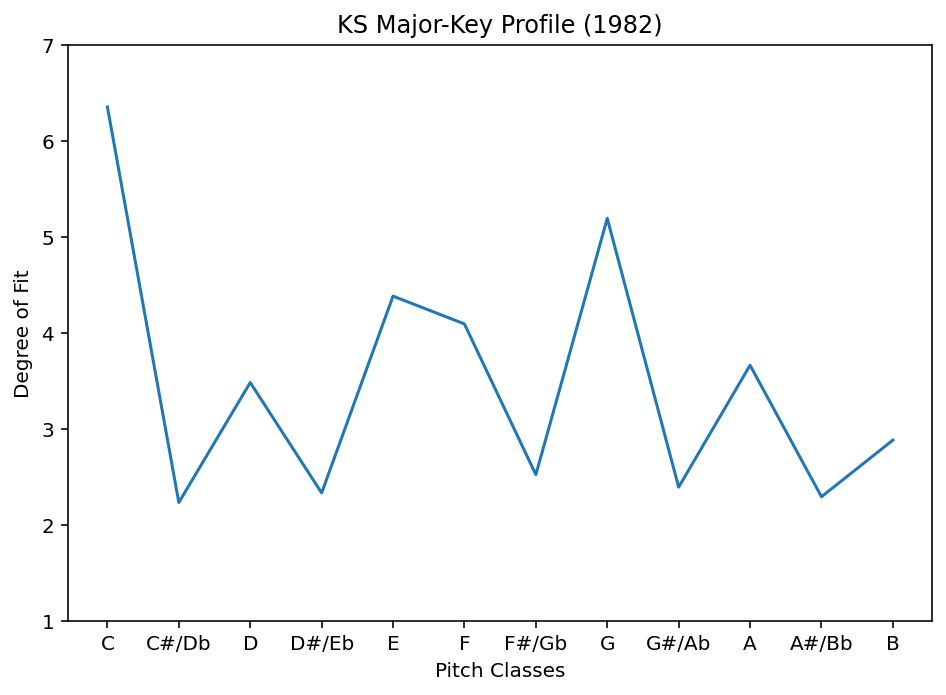

In [123]:
ks = analysis.discrete.KrumhanslSchmuckler()
ks = ks.getWeights('major')
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
pcs = ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B']
ax.plot(pcs,ks)
ax.set_ylabel('Degree of Fit')
ax.set_xlabel('Pitch Classes')
plt.ylim([1,7])
plt.title('KS Major-Key Profile (1982)')
plt.show()

Now let's compute the distribution of pitch classes found in the Mozart theme.

<music21.graph.plot.HistogramPitchClass for <music21.stream.Score 0x167ae94bbb0>>

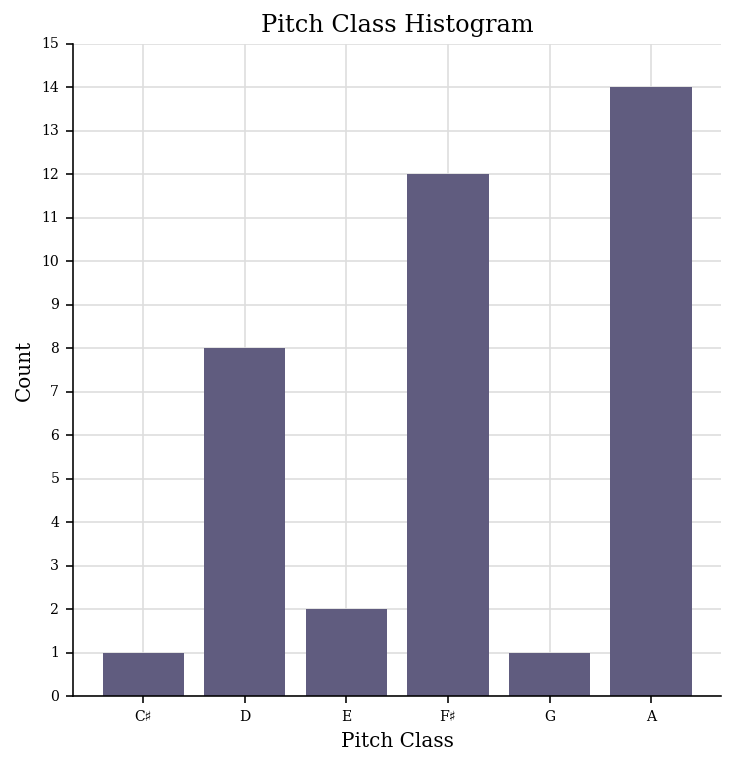

In [124]:
theme1.plot('histogram', 'pitchClass')

Unsurprisingly, the PC content emphasizes scale-degrees associated with the D major scale. The KS algorithm identifies the key/scale of an excerpt by correlating the major and minor-key profiles for every starting pitch class with the distribution of pitch classes in the excerpt. Let's take this approach for our example and print the correlation coefficient for the most correlated key.

In [125]:
key = theme1.analyze('key.krumhanslschmuckler')
print(key)
key.correlationCoefficient

D major


0.86879194487412

The KS algorithm matches our intuitions! Here's the D major scale for comparison.

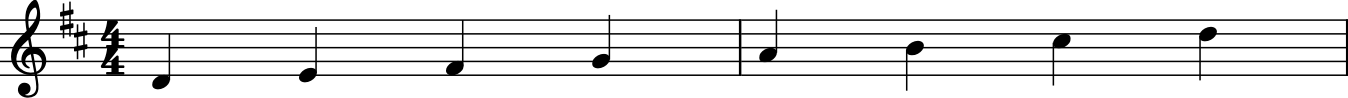

In [126]:
from music21 import * # analysis package for symbolic data
m1 = stream.Measure()
m1.timeSignature = meter.TimeSignature('4/4')
m1.keySignature = key.KeySignature(2)
m1.append([note.Note('D'), note.Note('E'), note.Note('F#'), note.Note('G')])
m2 = stream.Measure()
m2.append([note.Note('A'),note.Note('B'),note.Note('C#5'),note.Note('D5')])
p = stream.Part()
p.append([m1, m2])
p.show()

#### 1.1.2 Example 2 -- TAVERN, K. 501
What about for an excerpt that modulates from one key to another? Let's look at the opening phrase from Mozart, K. 501, which tonicizes (or modulates to) the key of the dominant.

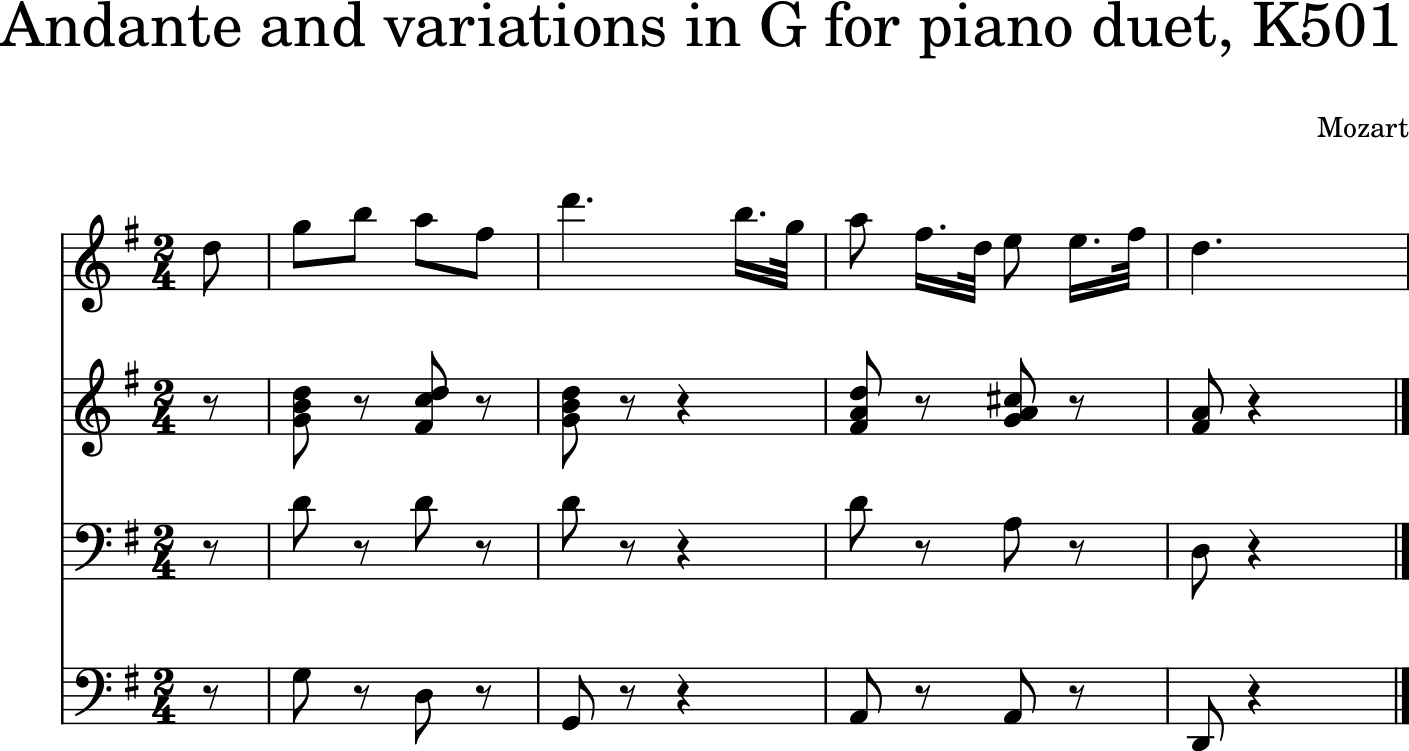

In [127]:
theme2 = converter.parse("M501_00_01a_a.krn")
theme2.show()

What's the key across the entire excerpt?

In [128]:
key = theme2.analyze('key.krumhanslschmuckler')
print(key)
key.correlationCoefficient

D major


0.94710732553199

The excerpt begins in G major, but the KS algorithm predicts that the entire excerpt is in D major instead. We can address this issue by performing a windowed analysis using the KS algorithm.

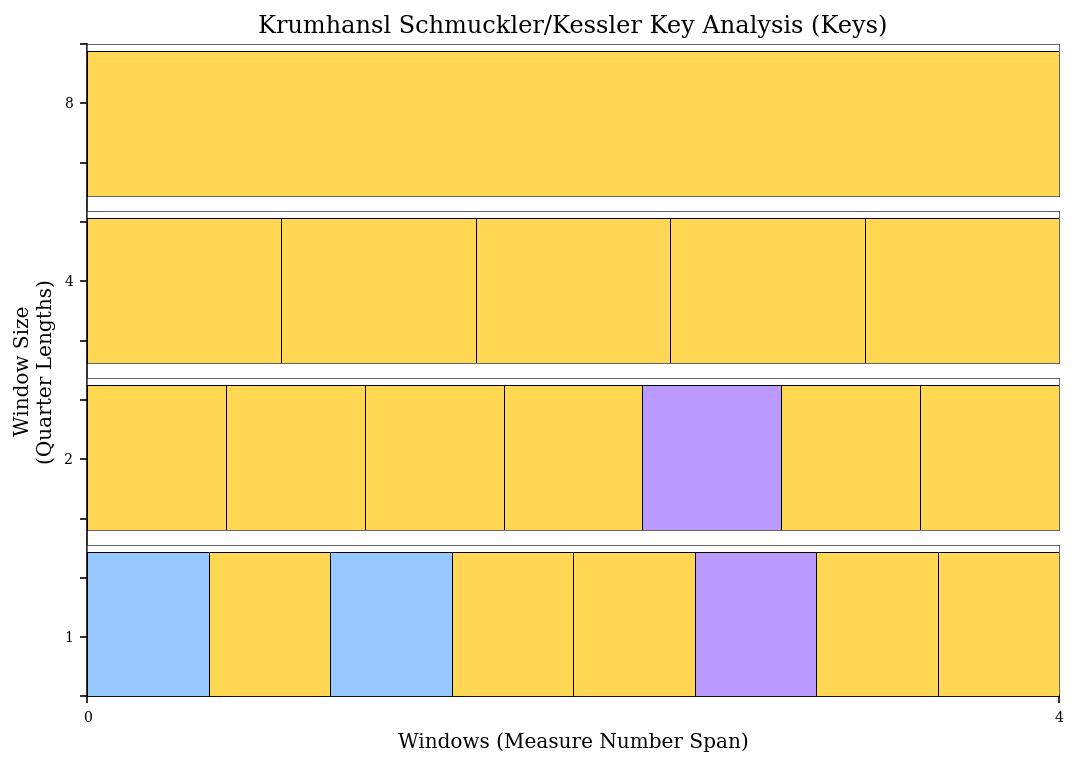

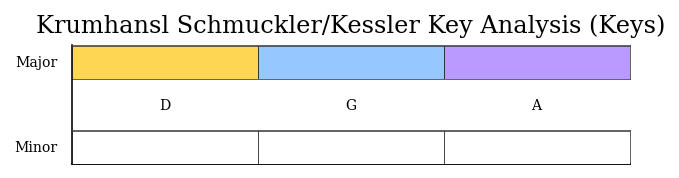

In [129]:
# Key finding over windows of various sizes (1-12 quarter-note beats).
p = graph.plot.WindowedKey(theme2)
p.run()

The windowed analysis is better, but still doesn't really conform to musical intuitions. Perhaps listeners use more than 0th-order statistics to determine the key?

### 1.2 librosa -- Audio
#### 1.2.1 Example 1 -- TAVERN, K. 573
Sanity check: Let's try all of this again for the audio representation.

In [130]:
file = 'K573_themeA.wav'
sig , sr = librosa.load(file,mono=True,sr=None)

Play the audio file.

In [131]:
ipd.Audio(file)

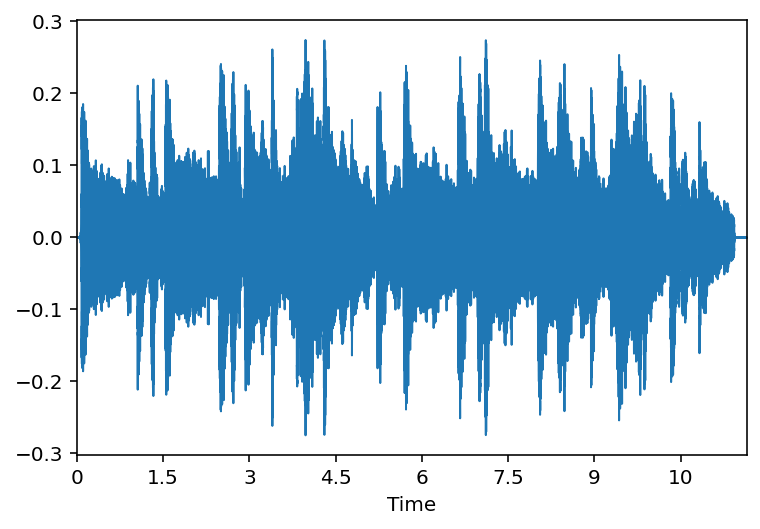

In [132]:
librosa.display.waveplot(sig,sr)

In [133]:
sig_harmonic, sig_percussive = librosa.effects.hpss(sig)
chroma = librosa.feature.chroma_cqt(sig_harmonic,sr)

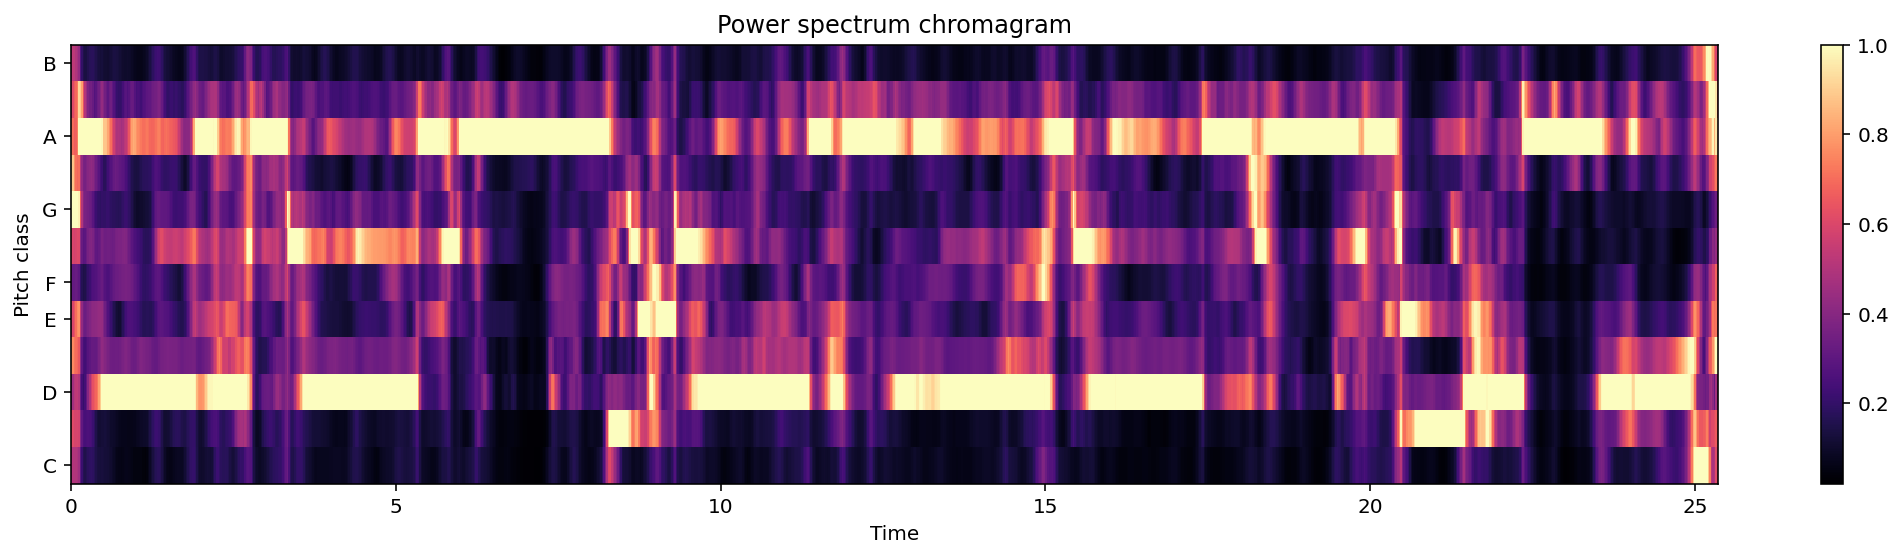

In [134]:
plt.figure(figsize=(15, 4))
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Power spectrum chromagram')
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Mean Chroma Estimates'}>

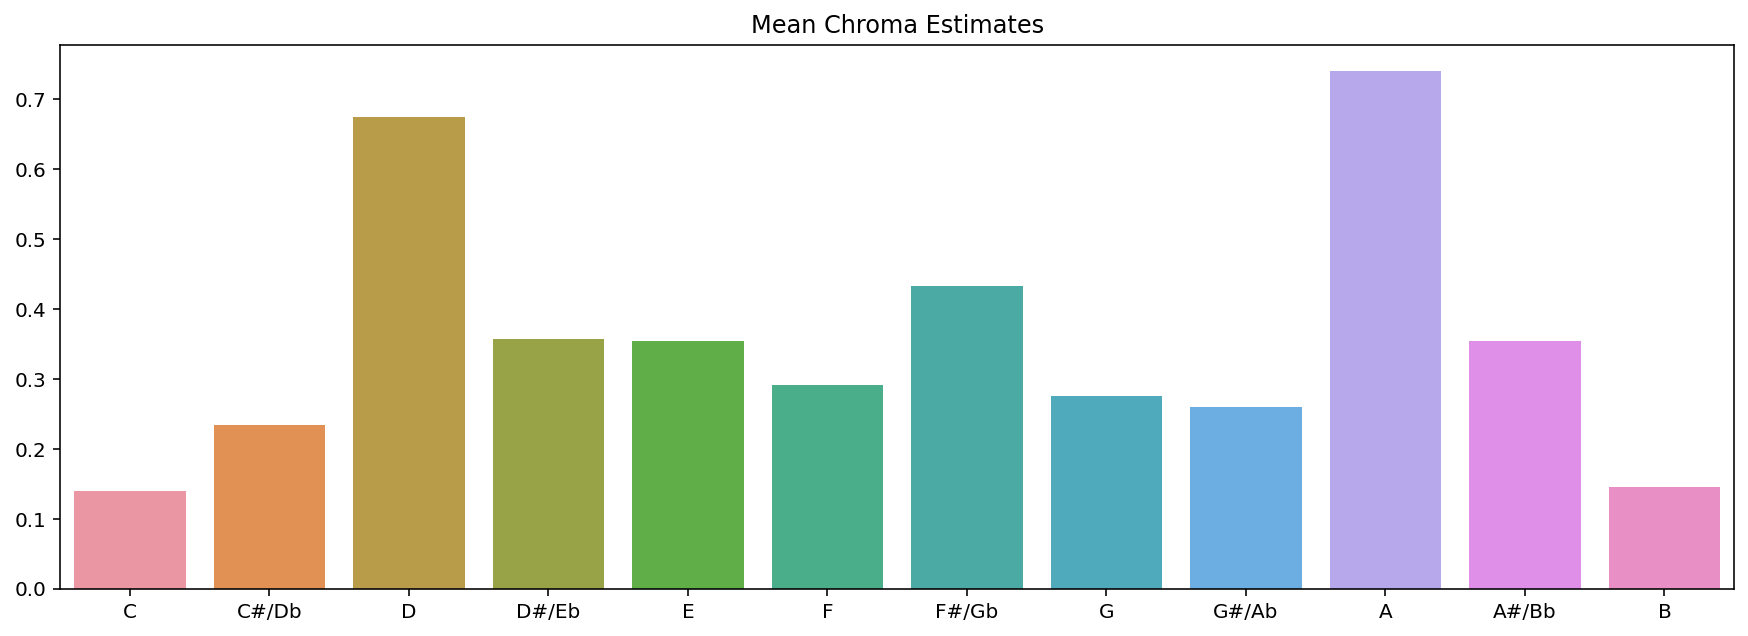

In [135]:
#https://rramnauth2220.github.io/blog/posts/code/200525-feature-extraction.html
# a pitch histogram using CENS
chroma_mean = np.mean(chroma,axis=1)
chroma_std = np.std(chroma,axis=1)

# plot the summary
plt.figure(figsize = (15,5))
plt.title('Mean Chroma Estimates')
sns.barplot(x=pcs,y=chroma_mean)

In [119]:
# Use Krumhansl-Schmuckler classifier to guess the key of SongInBMinor.mp3
#krumhansl_schmuckler = classifiers.KrumhanslSchmuckler()
#dist = pd.PitchDistribution.from_file('K573_themeA.wav')
#krumhansl_schmuckler.get_key(dist) # Returns Key object Key('B', 'minor')

In [136]:
pyACA.computeKey(sig,sr)

'D Maj'

TO DO
clean up code for key finding using keyedin package. 
implement same code for K. 501.
correlate pitch distributions from symbolic and audio for sake of comparison.

#### 1.2.2 Example 2 -- TAVERN, K. 501
SAME PROBLEM

### Summary: List limitations of key-finding methods.
Input (PC distribution is too limiting)
model -- don't assume a template
This means you'll have to use richer representations and test on a data set with key/mode annotations.


## 2 Scale Identification (Key Finding) -- Beyond Major/Minor
Example from Billboard that is not in major or minor. Based on Harasim, perhaps.

## 3 Scale Identification (Key Finding) -- Beyond 12-TET
Based on Moelants et al. (2009)